# Face Detection and Mask Detection

This notebook runs a CV2 face detection then a pre-trained model to detect 'mask' or 'no-mask'

The code was original published https://www.mygreatlearning.com/blog/real-time-face-detection/



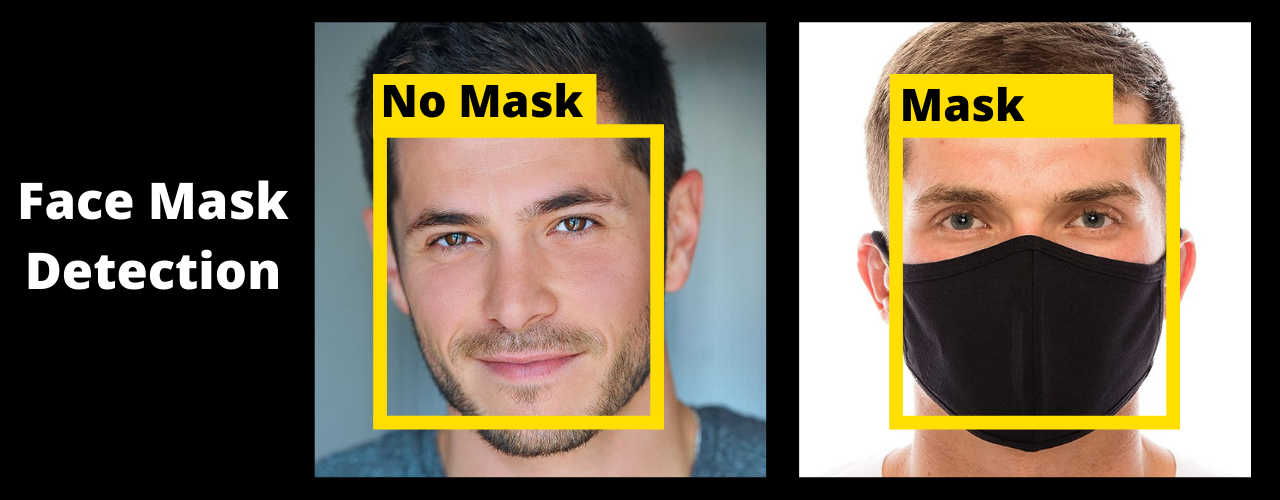

## Download the notebook code and support files from github


In [ ]:
!git clone https://github.com/jboyd170/face_mask_detection.git
%cd face_mask_detection

Cloning into 'face_mask_detection'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 107 (delta 26), reused 24 (delta 24), pack-reused 75
Receiving objects: 100% (107/107), 51.97 MiB | 8.03 MiB/s, done.
Resolving deltas: 100% (33/33), done.
/content/face_mask_detection


## Import libraries

In [ ]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from google.colab.patches import cv2_imshow

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
model = load_model("mask_recog.h5")

## The Face Detector Function

We'll use this function to identify face images then pass those images to a mask / no mask detector



In [ ]:
# face detector only
def face_detector(frame):
  # frame = cv2.imread(fileName)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.2,
                                        minNeighbors=4,
                                        minSize=(60,60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  for (x, y, w, h) in faces:
      label = "Face"
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
      cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 3)
  #cv2_imshow(frame)
  return frame

## The Mask Detector Function


In [ ]:
# mask detector
def face_mask_detector(frame):
  # frame = cv2.imread(fileName)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.2,
                                        minNeighbors=4,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]
  for (x, y, w, h) in faces:
      #print("faces len ",len(faces))
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (224, 224))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)
      #print("list len: ",len(faces_list))
      if len(faces_list)>0:
          preds = model.predict(faces_list[-1])
      for pred in preds:
          #print(pred)
          (mask, withoutMask) = pred
          #print(mask, withoutMask)
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

      cv2.rectangle(frame, (x, y), (x + w, y + h),color, 3)
  # cv2_imshow(frame)

  return frame

## Test the functions on a few test images


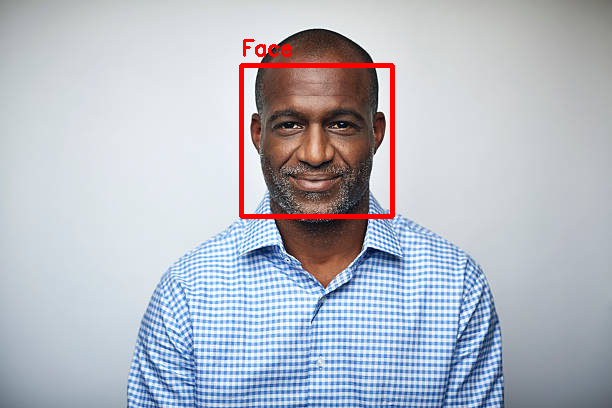

In [ ]:
input_image = cv2.imread("data/headshot1.jpg")
output = face_detector(input_image)
cv2_imshow(output)

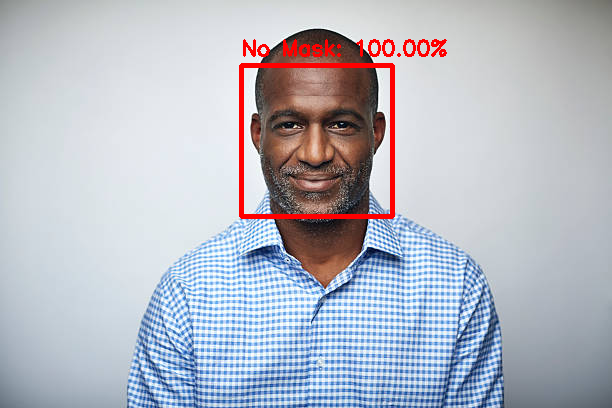

In [ ]:
input_image = cv2.imread("data/headshot1.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

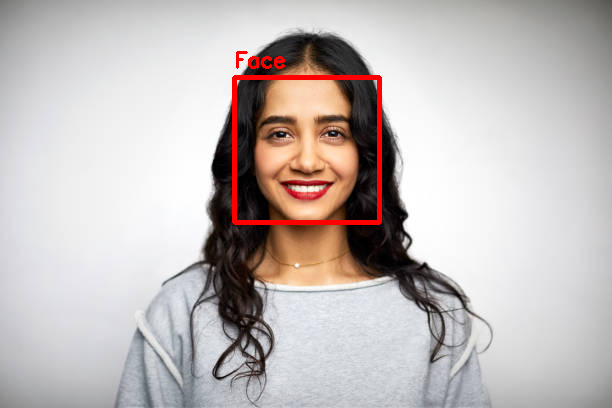

In [ ]:
input_image = cv2.imread("data/headshot2.jpg")
output = face_detector(input_image)
cv2_imshow(output)

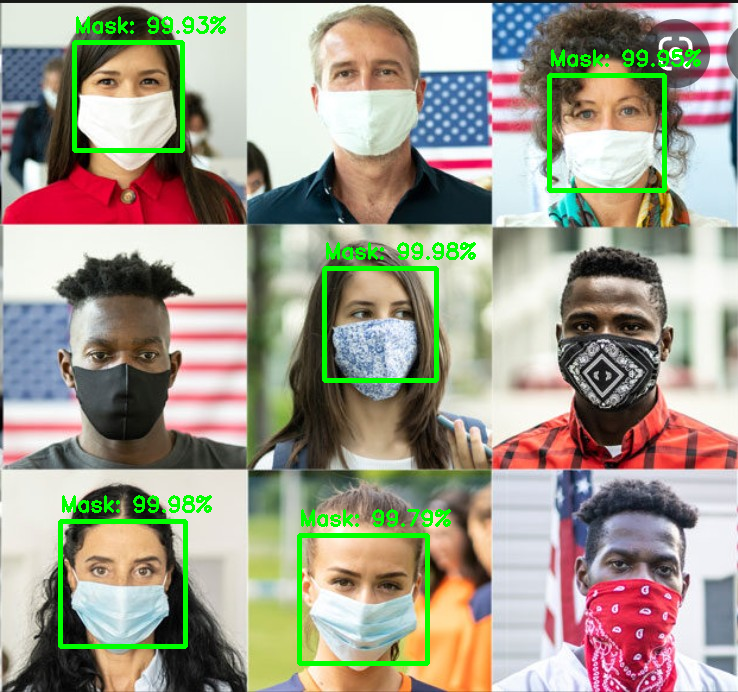

In [ ]:
input_image = cv2.imread("data/9faces_masks_2.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

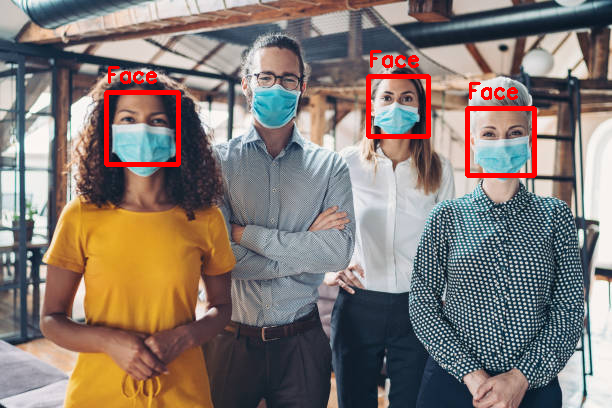

In [ ]:
input_image = cv2.imread("data/multi-face4.jpg")
output = face_detector(input_image)
cv2_imshow(output)

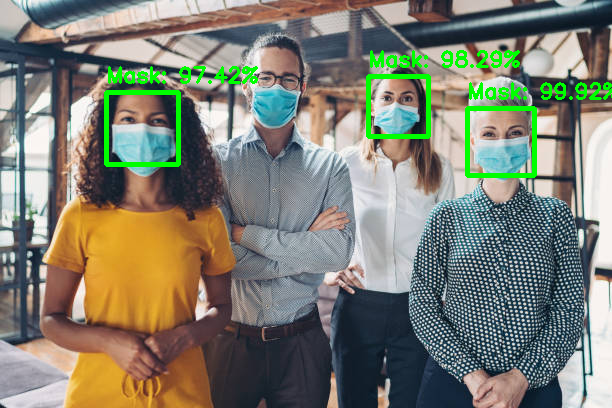

In [ ]:
input_image = cv2.imread("data/multi-face4.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

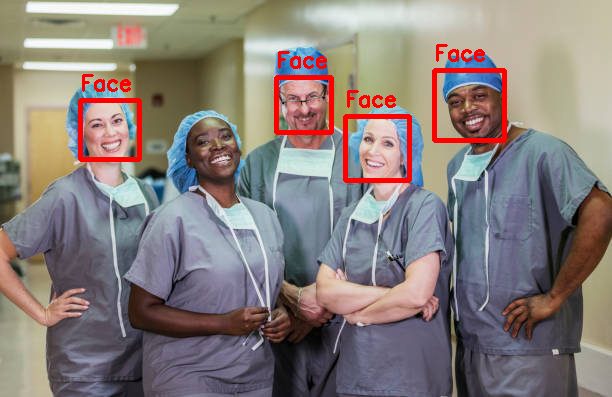

In [ ]:
input_image = cv2.imread("data/multi-face5.jpg")
output = face_detector(input_image)
cv2_imshow(output)

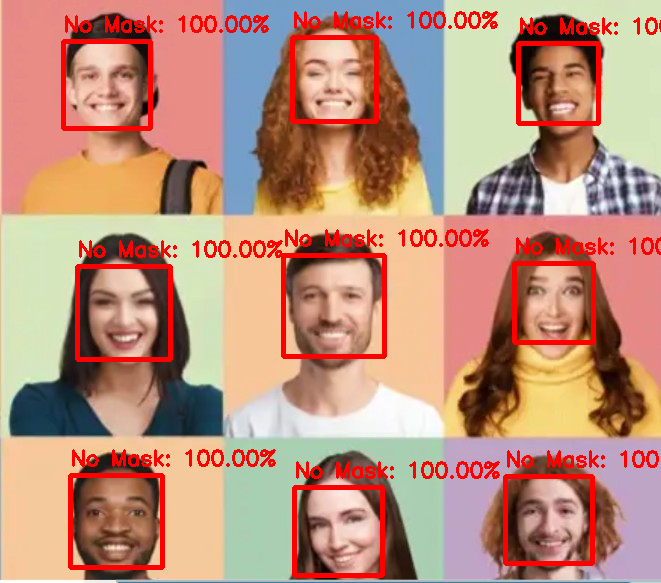

In [ ]:
input_image = cv2.imread("data/9faces.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

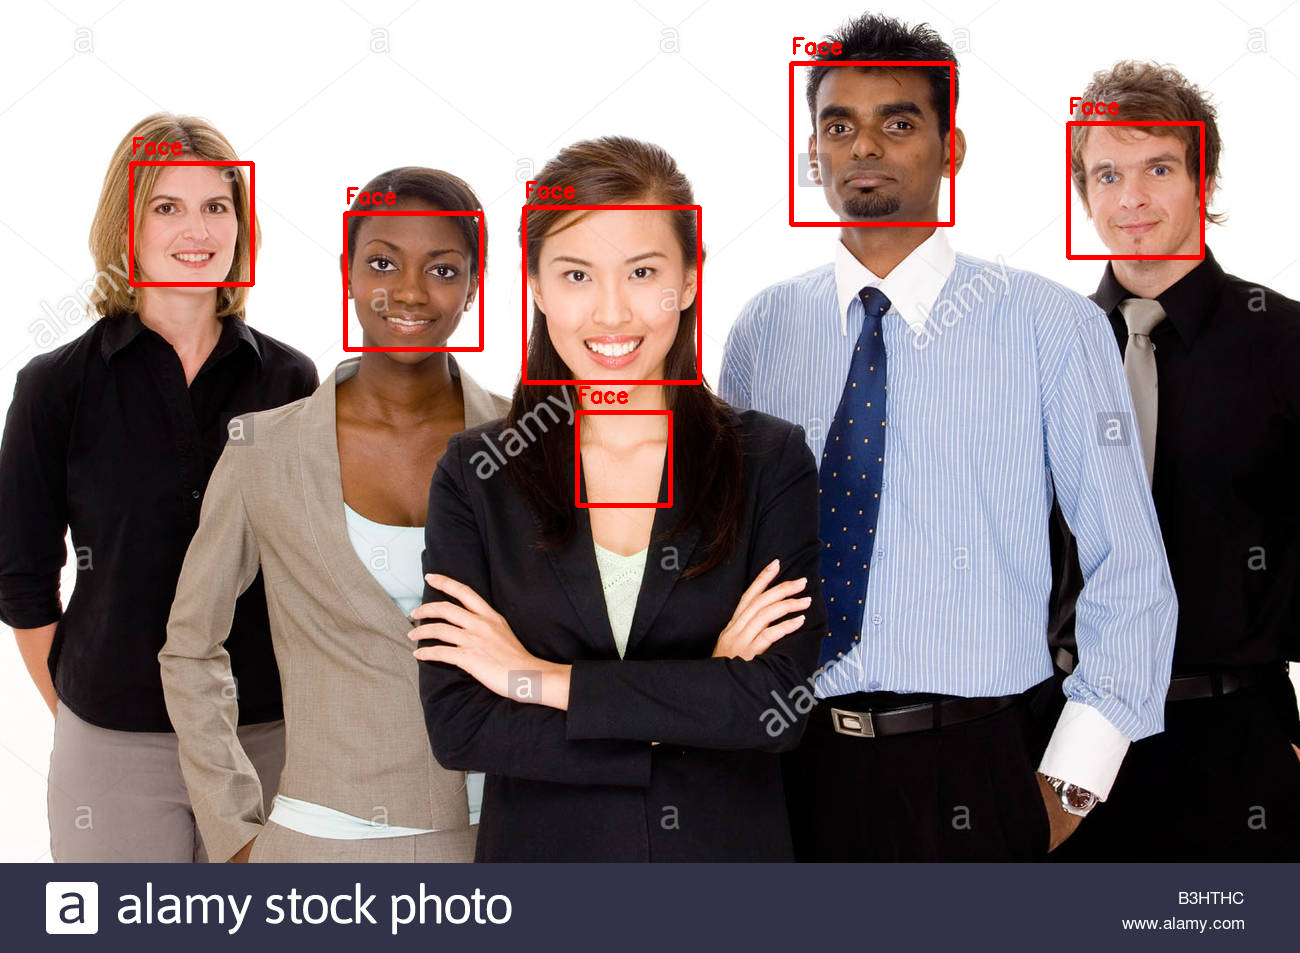

In [ ]:
input_image = cv2.imread("data/multi-face8.jpg")
output = face_detector(input_image)
cv2_imshow(output)

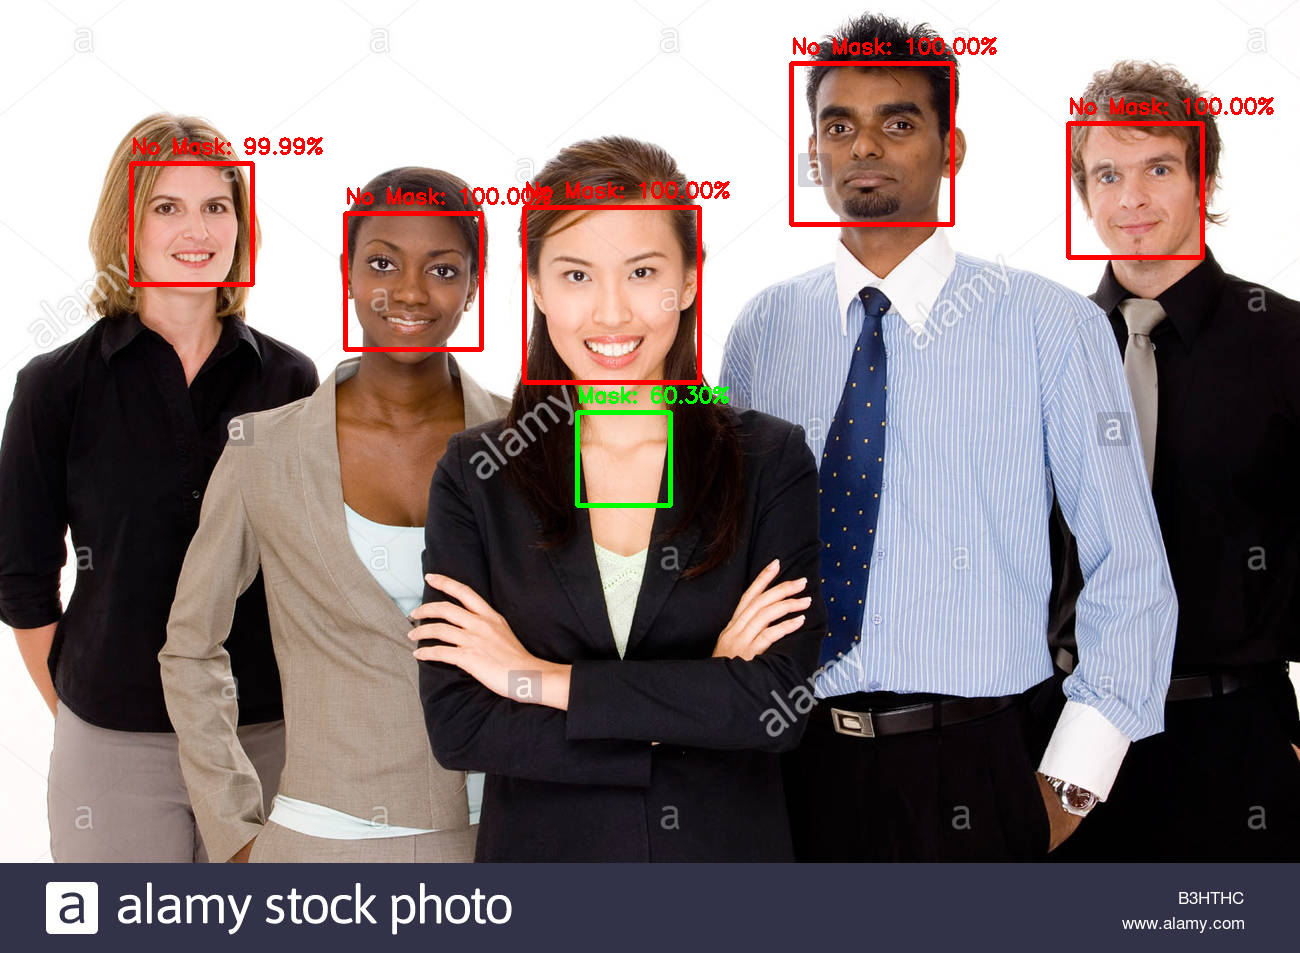

In [ ]:
input_image = cv2.imread("data/multi-face8.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

## CVDazzle.com - Avoid Facial Detection

CVDazzle.com is a site that highlights ways to avoid facial detection using facial make-up and hair styles.  Try a few of these images in the face detector code below.  See if you can tune the parameters to detect these faces.  

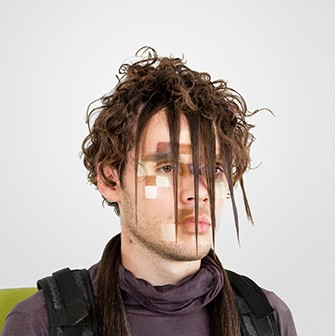

In [ ]:
input_image = cv2.imread("data/cvDazzle2.jpg")
output = face_detector(input_image)
cv2_imshow(output)

## Run the mask detector the sample video

This will take a few minutes to run.  The output is written to the file 'output.avi'.  Download the file to run. 

In [ ]:
cap = cv2.VideoCapture('data/video.mp4')
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = face_mask_detector(frame)
  out.write(output)
out.release()
print("Done processing video")

Processing Video...
Done processing video


Once the video has been processed, download the output.avi file.  Submit your video output file in the classroom assignment.  


# Test your own images

On the left panel, hover over the folder 'data' and click the three dots on the right and select 'upload'.  Select a photo from your computer to upload. You can name it anything you want. You should see it in the folder along with the other 'headshots'.  

Copy one of the code blocks above to add a 'face detector' and another code block for a 'face mask detector'.   You'll need to edit the code to pull your image from the data folder.  

In [ ]:
input_image = cv2.imread("data/multi-face8.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

## Create your Own Video

Take a short video of someone to test the face detector or mask detector.  Your video should be no longer than 30 seconds.  

Upload the video to the data folder.  It may take a minute for the upload and copy the required code blocks below to encode your video.  

Once your video is encoded, it should write out your video to a video file called output.avi.  

Download that file and submit that file to turn in your assignment. 

In [ ]:
# copy the video capture code block here and edit it to grab your video. 

## Eye Detector

The Haarcascade files attached have different detection capabilities.  There is one for eyes. 

Update the code to detect eyes and use a yellow box and font to highlight the eyes.



First, modify the code below to create a eyeCascade class and run it in the code block below. 

~~~
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
~~~

In [ ]:
#eyeCascade = ...

In [ ]:
# modify this function copied from block above to initialize an eye detector

def face_detector(frame):
  # frame = cv2.imread(fileName)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  eyes = faceCascade.detectMultiScale(gray,
                                    scaleFactor=1.2,
                                    minNeighbors=4,
                                    minSize=(60,60),
                                    flags=cv2.CASCADE_SCALE_IMAGE)
  for (x, y, w, h) in eyes:
      label = "eyes"
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
      cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 3)
  #cv2_imshow(frame)
  return frame

Run the code below to call your 'eye_detector' function.  Adjust your parameters to try to tune your detector to avoid false positives.  See tips below. 

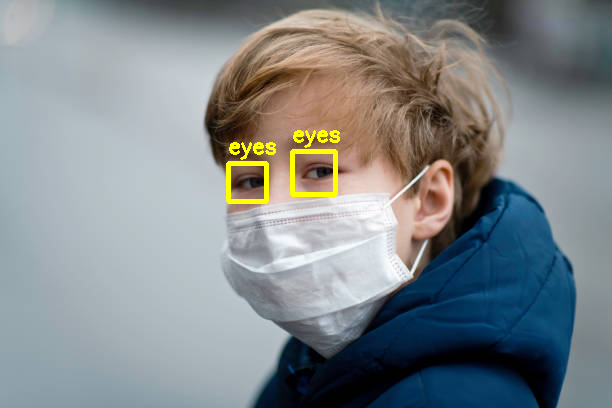

In [ ]:
input_image = cv2.imread("data/headshot9.jpg")
output = eye_detector(input_image)
cv2_imshow(output)

# False Positives

Haar cascades tend to be very sensitive to your choice in detectMultiScale parameters. The scaleFactor and minNeighbors being the ones you have to tune most often.

When you end up with false-positive detections (or no face or smile is detected at all), you should go back to your detectMultiScale function and attempt to tune the parameters by trial and error.

By increasing minNeighbors we can require that Haar cascades find more neighbors, thus removing the false-positive detection. 

Here are recommendations: 

scaleFactor – Parameter specifying how much the image size is reduced at each image scale.

Basically the scale factor is used to create your scale pyramid. More explanation can be found here. In short, as described here, your model has a fixed size defined during training, which is visible in the xml. This means that this size of face is detected in the image if present. However, by rescaling the input image, you can resize a larger face to a smaller one, making it detectable by the algorithm.

1.05 is a good possible value for this, which means you use a small step for resizing, i.e. reduce size by 5%, you increase the chance of a matching size with the model for detection is found. This also means that the algorithm works slower since it is more thorough. You may increase it to as much as 1.4 for faster detection, with the risk of missing some faces altogether.

minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.

This parameter will affect the quality of the detected faces. Higher value results in less detections but with higher quality. 3~6 is a good value for it.

minSize – Minimum possible object size. Objects smaller than that are ignored.

This parameter determine how small size you want to detect. You decide it! Usually, [30, 30] is a good start for face detection.

maxSize – Maximum possible object size. Objects bigger than this are ignored.